In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import random
from scipy.stats import norm
from scipy.stats import zscore

# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.gridspec as gridspec
plt.style.use('ggplot')

# Mounting Drive 
# To run mount personal drive where datasets are stored
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## Replace with your local path of datasets to run

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IE 7300/Project/hour.csv')

df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IE 7300/Project/day.csv')

##UNDERSTANDING AND ANALYZING THE DATA

In [6]:
print("The Training and Validation Dataset for this project has", df.shape[0],"Rows and",df.shape[1],"columns. The following is a bit about each column:")
df.describe()

The Training and Validation Dataset for this project has 17379 Rows and 17 columns. The following is a bit about each column:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
print("The Final Testing Dataset for this project has", df_test.shape[0],"Rows and",df_test.shape[1],"columns. The following is a bit about each column:")
df_test.describe()

The Final Testing Dataset for this project has 731 Rows and 16 columns. The following is a bit about each column:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
print("Here are the first 5 rows of the hourly (training/validation set) to view a bit about how the data actually looks:")
df.head()

Here are the first 5 rows of the hourly (training/validation set) to view a bit about how the data actually looks:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
print("Now looking to see what the missing values look like to determine if columns or rows need to be removed. First lets see how many Nulls are in each column:\n")
print("\n Training Set \n")
print(df.isnull().sum())
print("\n Testing Set \n")
print(df_test.isnull().sum())
print("\nOverall, the number of Null values for both sets:",df.isnull().any().sum())
print("\nAs can be seen, there are no Nulls that require removal or imputation")

Now looking to see what the missing values look like to determine if columns or rows need to be removed. First lets see how many Nulls are in each column:


 Training Set 

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 Testing Set 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Overall, the number of Null values for both sets: 0

As can be seen, there are no Nulls that require removal or imputation


In [10]:
print("Now to do a bit of column renaming!!\n")
df = df.rename(columns={'weathersit':'weather',
                        'dteday':'date',
                        'yr':'year',
                        'mnth':'month',
                        'hr':'hour',
                        'hum':'humidity',
                        'cnt':'total_count',
                        'temp': 'temp_actual',
                        'atemp': 'temp_feel',
                        'casual': 'unregistered',
                        'registered': 'registered'})

df_test = df_test.rename(columns={'weathersit':'weather',
                        'dteday':'date',
                        'yr':'year',
                        'mnth':'month',
                        'hum':'humidity',
                        'cnt':'total_count',
                        'temp': 'temp_actual',
                        'atemp': 'temp_feel',
                        'casual': 'unregistered',
                        'registered': 'registered'})
df.head()

Now to do a bit of column renaming!!



,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp_actual,temp_feel,humidity,windspeed,unregistered,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
print("Reducing any columns with substantial unique values as they hold no benefit to the predictive model\n")
df_temp = df.copy()
print("COLUMN NAME: UNIQUENESS RATIO\n")
for name in df.columns:
    dist = df[name].value_counts()
    Ratio = (dist.size/df.shape[0])*100    
    print(name,':', Ratio)
    if(Ratio > 75):
        df_temp.drop(name,axis=1,inplace=True)
        print(name)
df_bike = df_temp
print("\nNotice only column Instant was removed as it was an index column that was not necessary\n")

Reducing any columns with substantial unique values as they hold no benefit to the predictive model

COLUMN NAME: UNIQUENESS RATIO

instant : 100.0
instant
date : 4.206225904827666
season : 0.02301628402094482
year : 0.01150814201047241
month : 0.06904885206283445
hour : 0.1380977041256689
holiday : 0.01150814201047241
weekday : 0.04027849703665343
workingday : 0.01150814201047241
weather : 0.02301628402094482
temp_actual : 0.2877035502618102
temp_feel : 0.3740146153403533
humidity : 0.5121123194660222
windspeed : 0.17262213015708613
unregistered : 1.852810863686058
registered : 4.465159100063295
total_count : 5.000287703550262

Notice only column Instant was removed as it was an index column that was not necessary



In [ ]:
## Outliar Removal not performed as real world data especially weather can be 
## very random and it can be hard to prove outliars as opposed to extreme storms.
  
#df_bike_cont = df_bike[['temp_actual','temp_feel', 'humidity',	'windspeed', 'unregistered', 'registered', 'total_count']]
#z_scores = np.abs(zscore(df_bike_cont))
#outliar_safe = (z_scores < 3).all(axis=1)
#temp_df = df_bike
#df_bike = df_bike[outliar_safe]
#df_bike

In [12]:
## Discretizing the total count as a new column for both datasets

quant_1 = df['total_count'].quantile([0.25]).values[0]
quant_2 = df['total_count'].quantile([0.50]).values[0]
quant_3 = df['total_count'].quantile([0.75]).values[0]

for i,j in df_bike.iterrows():
  if(j['total_count'] <= quant_1):
     df_bike.at[i,'count_bin'] = 1
   
  elif (j['total_count'] <= quant_2):
     df_bike.at[i,'count_bin'] = 2
   
  elif (j['total_count'] <= quant_3):
     df_bike.at[i,'count_bin'] = 3
  
  else:   
    df_bike.at[i,'count_bin'] = 4

quant_1_t = df_test['total_count'].quantile([0.25]).values[0]
quant_2_t = df_test['total_count'].quantile([0.50]).values[0]
quant_3_t = df_test['total_count'].quantile([0.75]).values[0]

for i,j in df_test.iterrows():
  if(j['total_count'] <= quant_1):
     df_test.at[i,'count_bin'] = 1
   
  elif (j['total_count'] <= quant_2):
     df_test.at[i,'count_bin'] = 2
   
  elif (j['total_count'] <= quant_3):
     df_test.at[i,'count_bin'] = 3
  
  else:   
    df_test.at[i,'count_bin'] = 4

df_bike.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp_actual,temp_feel,humidity,windspeed,unregistered,registered,total_count,count_bin
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1.0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1.0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1.0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1.0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1.0


##VISUALIZING THE DATA AND ATTRIBUTES

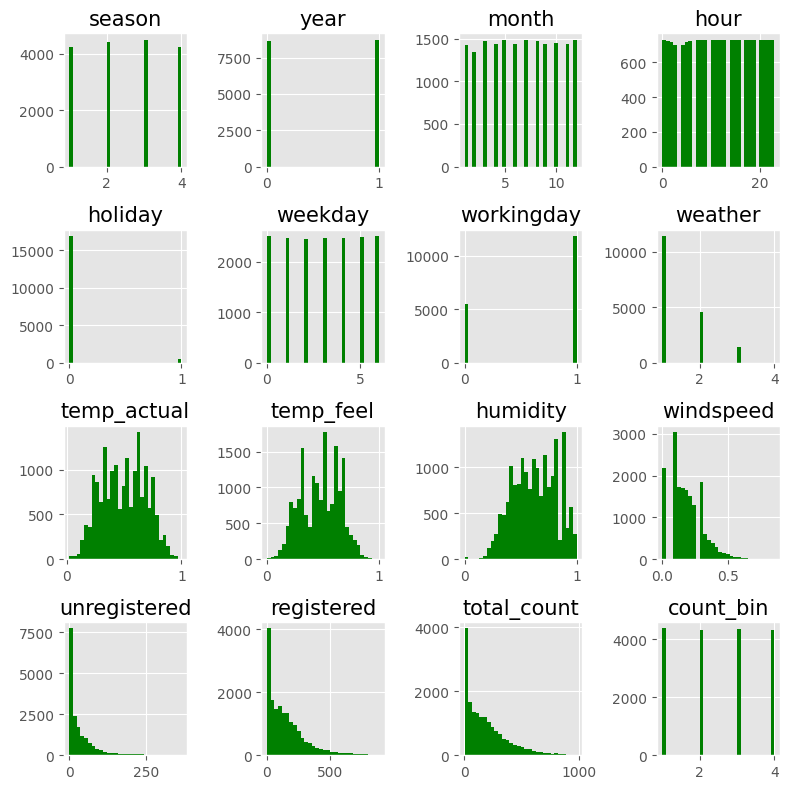

In [ ]:
fig = df_bike.hist(bins = 30, figsize=(8, 8),color = 'green')
[x.title.set_size(15) for x in fig.ravel()]
plt.tight_layout()
plt.show()

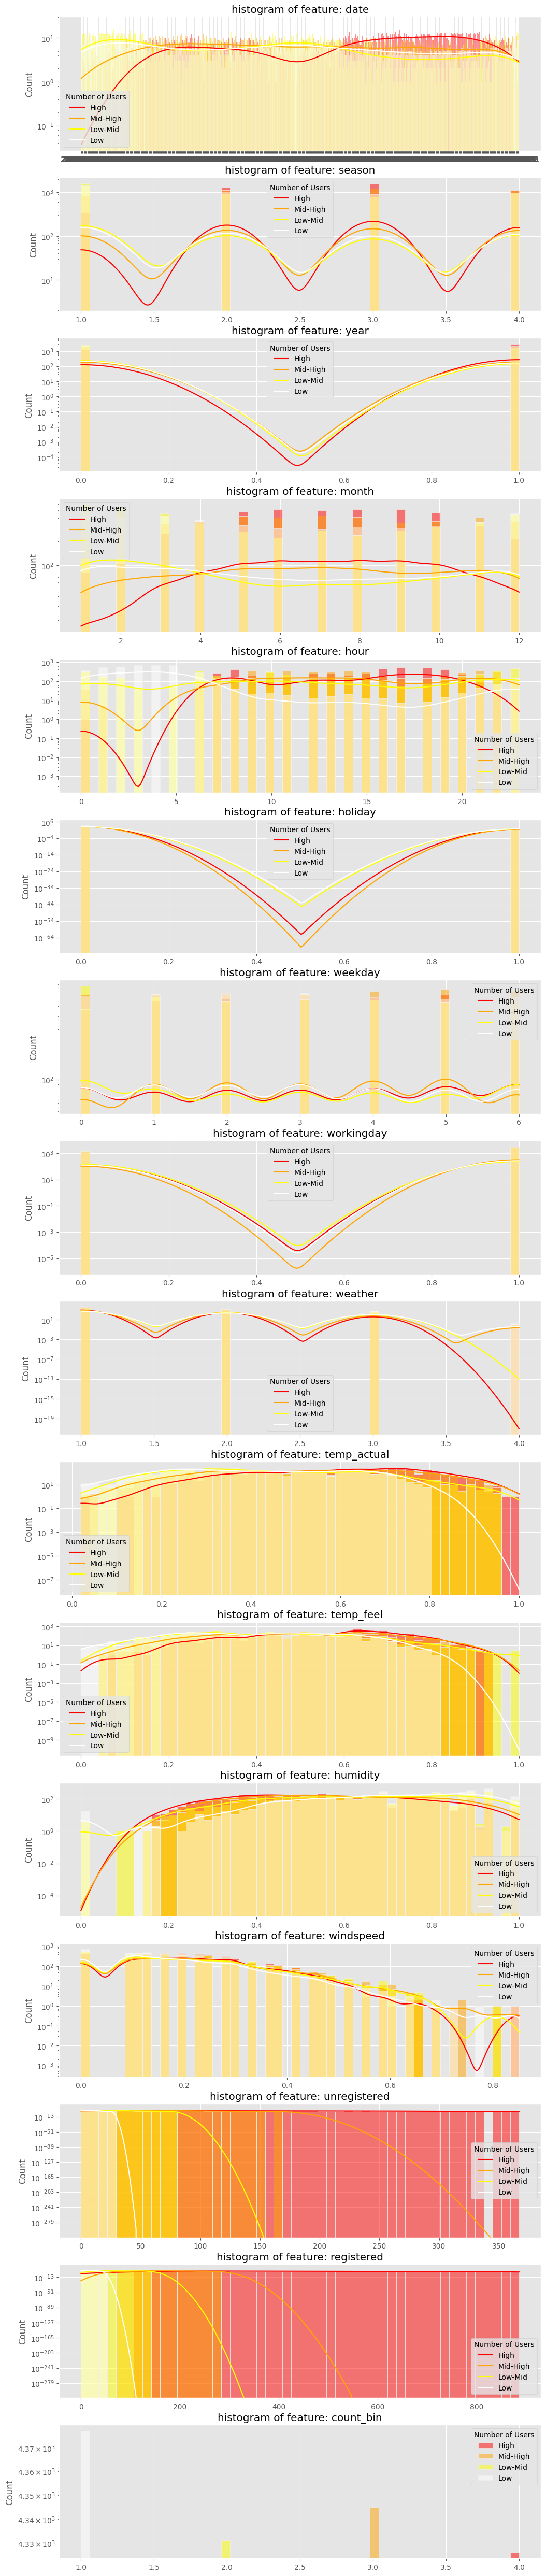

In [ ]:
## Checking out how the features distribute for based on the target column
## This done using engineered bin column of total rider count

features = df_bike.iloc[:,df_bike.columns!=('total_count')].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)

for i, feat in enumerate(df_bike[features]):
    ax = plt.subplot(gs[i])
    sns.histplot(x=df_bike[feat],log_scale=(False, True), ax=ax, kde=True,bins=50,multiple='layer',hue=df_bike['count_bin'],palette = ['white','yellow','orange','red'])
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(feat))
    plt.legend(title = 'Number of Users',labels = ['High','Mid-High','Low-Mid','Low'])
    
plt.show()

Text(0.5, 0.98, 'Hourly bicycle count on weekdays and weekends')

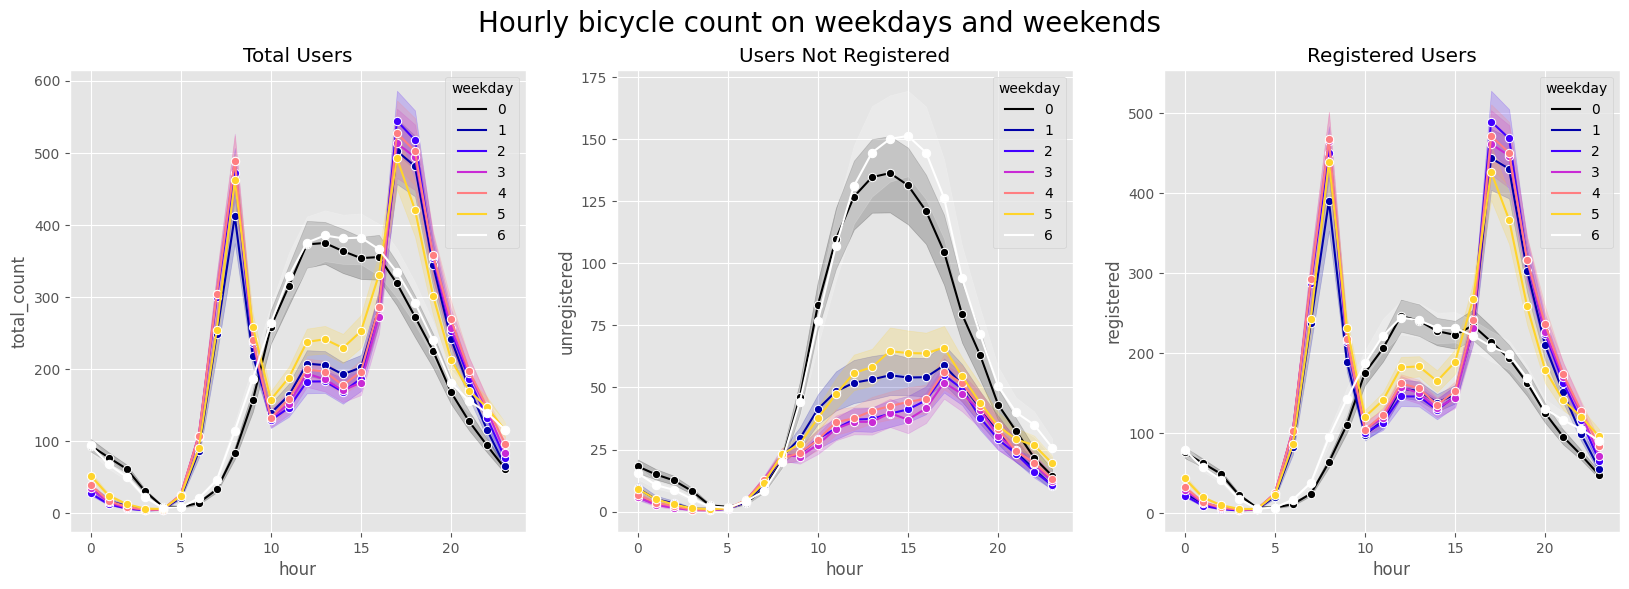

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,6))

sns.lineplot(data=df_bike, x='hour', y='total_count', hue='weekday',marker = 'o',palette = 'gnuplot2',ax=ax1)
ax1.set(title='Total Users')

sns.lineplot(data=df_bike, x='hour', y='unregistered', hue='weekday',marker = 'o',palette = 'gnuplot2',ax = ax2)
ax2.set(title='Users Not Registered')

sns.lineplot(data=df_bike, x='hour', y='registered', hue='weekday', marker = 'o', palette= 'gnuplot2', ax=ax3) 
ax3.set(title='Registered Users')

fig.suptitle('Hourly bicycle count on weekdays and weekends', fontsize=20)


[Text(0.5, 1.0, 'The number of bikes in various weather conditions')]

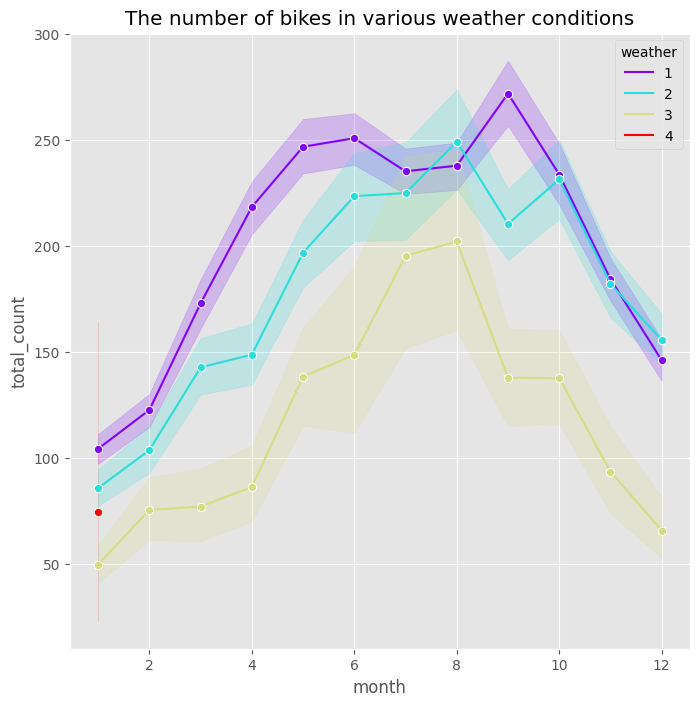

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.lineplot(data=df_bike, x='month', y='total_count', hue='weather', marker = 'o',palette = 'rainbow', ax=ax)
ax.set(title='The number of bikes in various weather conditions')

[Text(0.5, 1.0, 'The number of bike rentals by weekday (Differentiated btwn Holidays)')]

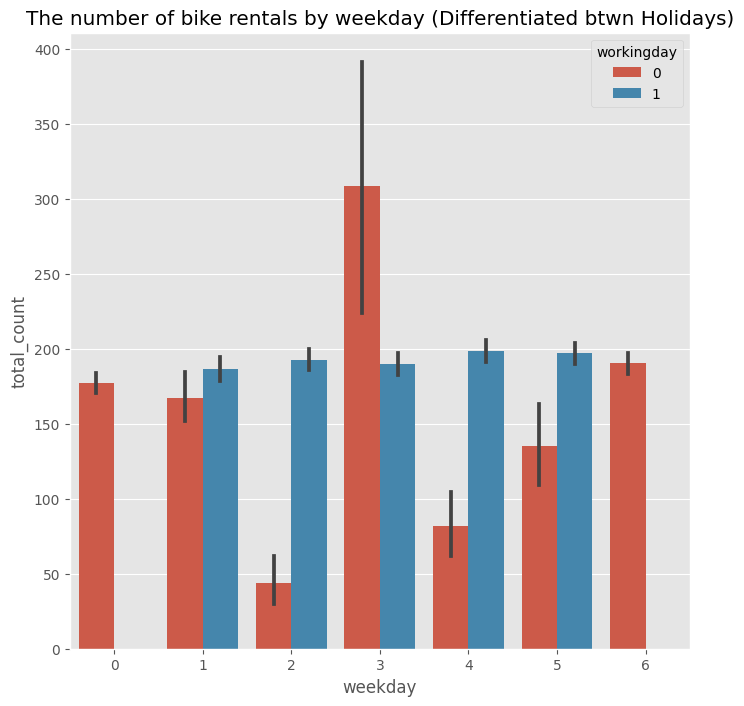

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=df_bike, x='weekday', y='total_count', hue = 'workingday',ax=ax)
ax.set(title='The number of bike rentals by weekday (Differentiated btwn Holidays)')

[Text(0.5, 1.0, 'Relation between windspeed and users')]

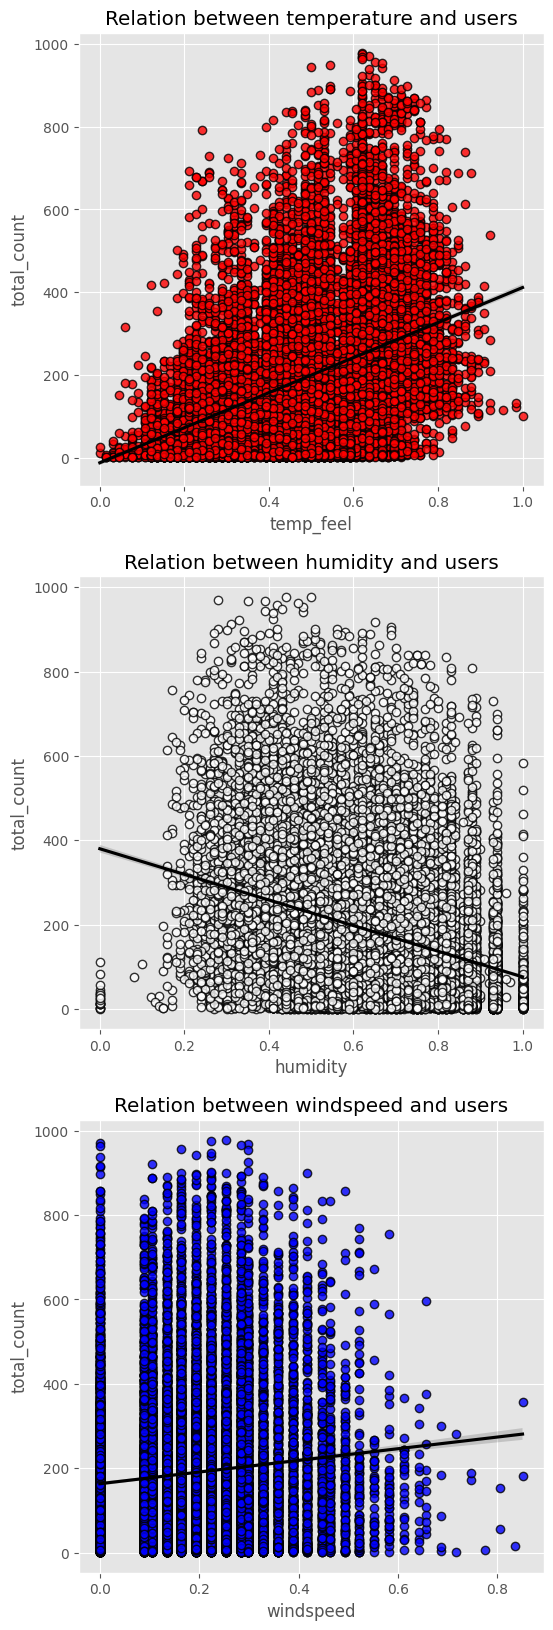

In [ ]:
##Regression to view relationships of temperature windspeed and humidity with respect to count.

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(6,20))

sns.regplot(x=df['temp_feel'], y=df['total_count'], scatter_kws={"color": 'red',"edgecolor":'black'}, line_kws={"color": "black"}, ax=ax1)
ax1.set(title="Relation between temperature and users") 

sns.regplot(x=df['humidity'], y=df['total_count'], scatter_kws={"color": "white","edgecolor":'black'}, line_kws={"color": "black"}, ax=ax2) 
ax2.set(title="Relation between humidity and users")

sns.regplot(x=df['windspeed'], y=df['total_count'], scatter_kws={"color": "blue","edgecolor":'black'}, line_kws={"color": "black"}, ax=ax3) 
ax3.set(title="Relation between windspeed and users")


In [13]:
## As both are found to have inverse relationship on riders 
df_bike['heat_index'] = (df_bike['humidity'] / (.000001 + df_bike['temp_feel']))
df_test['heat_index'] = (df_test['humidity'] / (.000001 + df_test['temp_feel']))

<ipython-input-19-cdb36e20b190>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat = df_bike.corr()


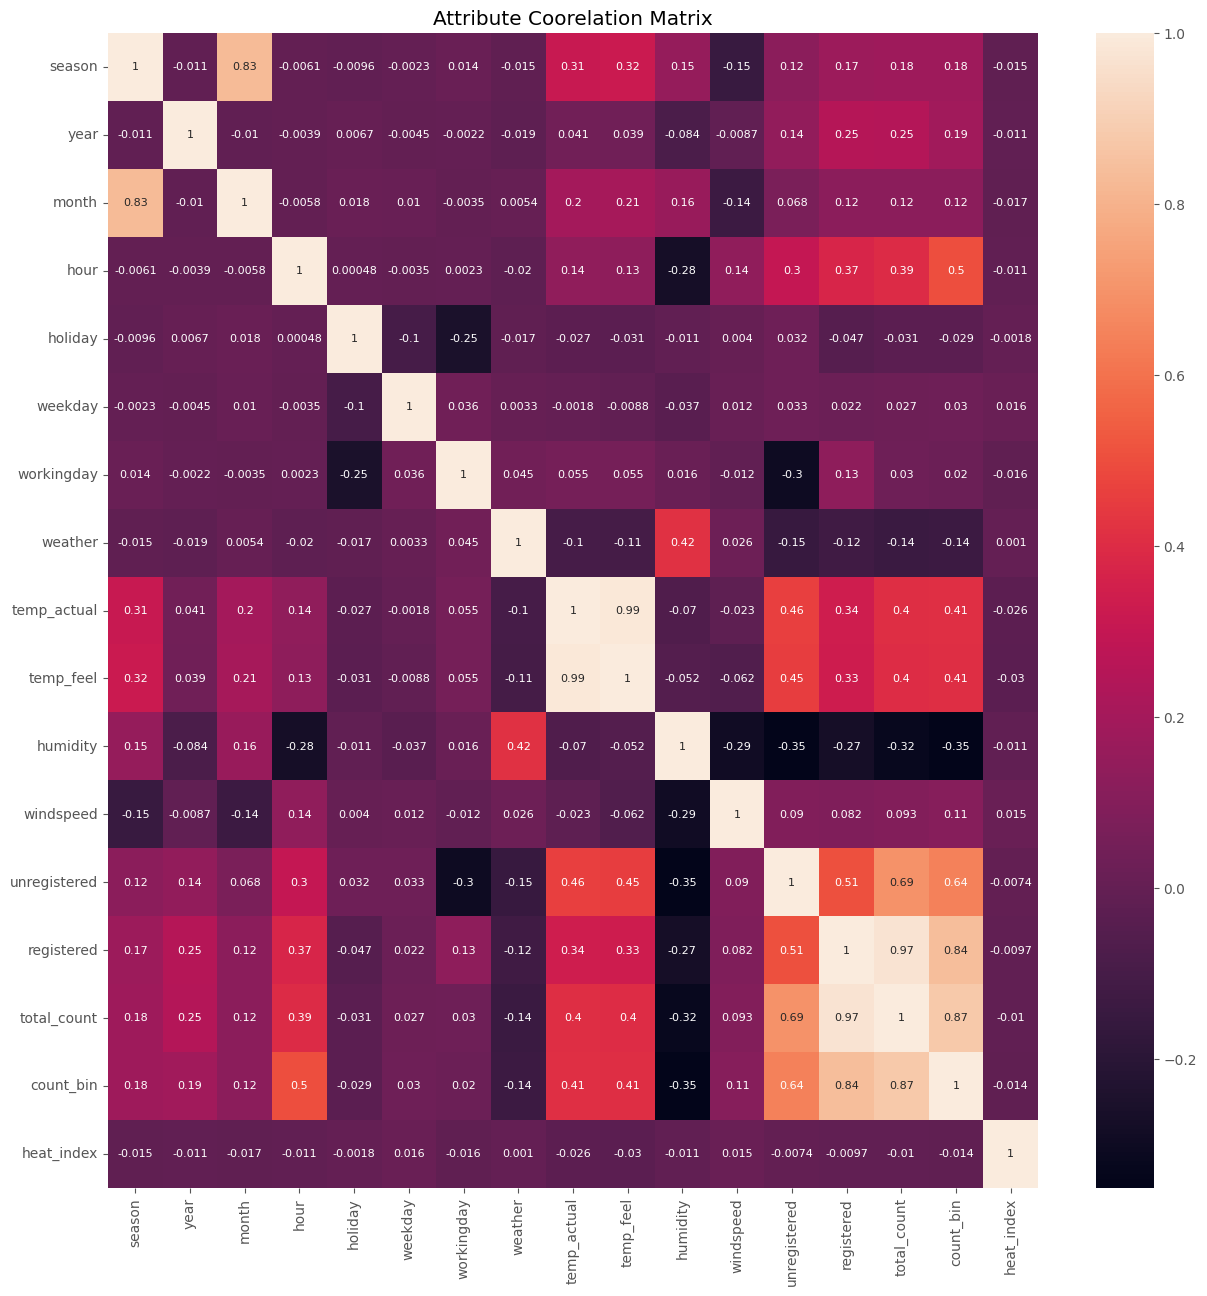

In [ ]:
cor_mat = df_bike.corr()
plt.figure(figsize=(15,15))
corelate = sns.heatmap(cor_mat, annot=True, annot_kws={'size':8}).set_title('Attribute Coorelation Matrix')

plt.show()

#deletable = cor_mat.where(np.tril(np.ones(cor_mat.shape), -1).astype(np.bool))
#df_bike.drop([column for column in deletable.columns if any(deletable[column] > 0.95)],axis=1,inplace=True)

In [14]:
# Baselines are used to prove overfitting(OF)
df_bike_baseline = df_bike.reindex(columns=['season','year','month','hour','holiday','weekday','workingday','weather','temp_feel','humidity','windspeed','heat_index','unregistered','registered','count_bin','total_count'])
df_test_baseline = df_test.reindex(columns=['season','year','month','holiday','weekday','workingday','weather','temp_feel','humidity','windspeed','heat_index','unregistered','registered','count_bin','total_count'])

# Historicals are used for first set of models - Columns kept with data similar
# to passenger count like count_bin and unregistered users
df_bike_historical = df_bike.reindex(columns=['season','year','month','hour','holiday','weekday','workingday','weather','temp_feel','humidity','windspeed','heat_index','unregistered','count_bin','total_count'])
df_test_historical = df_test.reindex(columns=['season','year','month','holiday','weekday','workingday','weather','temp_feel','humidity','windspeed','heat_index','unregistered','count_bin','total_count'])

# Limiteds are used for data limited only to weather forecast
df_bike_limited = df_bike_historical.drop(['unregistered','count_bin'],axis = 1)
df_test_limited = df_test_historical.drop(['unregistered','count_bin'],axis = 1)


In [15]:
class LinearRegression:

    def __init__(self, X,y, tolerance, learningRate, maxIteration,lam = 0, 
                 batch_sample_size = 1, gd = False, sgd = False, 
                 regularization = False, norm = "ridge",error_type = 'sse',
                 final_test = 0):
      self.X = X
      self.y = y
      self.tolerance = tolerance
      self.learningRate = learningRate
      self.maxIteration = maxIteration
      self.gd = gd
      self.sgd = sgd
      self.batch_sample_size = batch_sample_size
      self.regularization = regularization
      self.lam = lam
      self.norm  = norm 
      self.error_type = error_type
      self.final_test = final_test

    def splitData(self):
      X_train, X_test, y_train, y_test = train_test_split(self.X, 
                                                          self.y,
                                                          test_size =0.3,
                                                          random_state=0)
      return (X_train, X_test, y_train, y_test)

    def add_X0(self,X):
      return np.column_stack([np.ones([X.shape[0],1]), X ])

    def normalizeTrain(self, X):
      mean = np.mean(X, axis = 0)
      std = np.std(X, axis = 0)
      
      X_norm = (X - mean) / std
      X_norm = self.add_X0(X_norm)
      
      return(X_norm, mean, std)

    def normalizeTest(self, X, mean, std):
      X_norm = (X - mean) / std
      X_norm = self.add_X0(X_norm)
      
      return(X_norm)
    
    def checkFullRank(self,X):
      rank = np.linalg.matrix_rank(X)
      
      if (rank == min(X.shape)):
        self.fullRank = True
        print("Data is full rank")
      else:
        self.fullRank = False
        print("Data is not full rank")

    def checkLowRank(self,X):
      if (X.shape[0] < X.shape[1]):
        self.lowRank = True
        print('Data is Low Rank')
      else:
        self.lowRank = False
        print("Data is not Low Rank")
        
    def normalEquation(self, X, y):
      if (self.regularization == True):
        if(self.norm == "ridge"):
          print("L2 Norm being applied")
          return(np.linalg.inv((X.T.dot(X)) + (self.lam) * (np.identity(X.shape[1]))).dot(X.T).dot(y))
        else:
          print("L1 Norm being applied")
          return(np.linalg.inv(X.T.dot(X)).dot((X.T).dot(y) - ((self.lam/2) * (np.identity(X.shape[1])))))
      else:
        print("No penalty added")
        return(np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y))

    def predict(self, X):
      return (X.dot(self.w))

    def sse(self, X, y):
      y_hat = self.predict(X)
      return (((y_hat-y)**2).sum())

    def rmse(self,X, y):
      y_hat = self.predict(X)
      return (np.sqrt(((y-y_hat)**2).mean()))

    def mae(self,X, y):
      y_hat = self.predict(X)
      return ((np.abs(y_hat-y)).mean())

    def r2error(self,X,y):
      y_hat = self.predict(X)
      y_mean = np.mean(y)
      rss = ((y_hat-y)**2).sum()
      tss = ((y_hat-y_mean)**2).sum()
      return(1 - (rss / tss))

    def tStat(self,X,y):
      r2 = self.r2error(X,y)
      r = np.sqrt(r2)
      t = r * (np.sqrt((X.shape[0] - 2)/(1-r2)))
      return(t)

    def gradientDescent(self, X, y):
      errors = []
      err_prev = np.inf

      for i in tqdm(range(self.maxIteration)):
        gradient = self.costDerivative(X,y)

        if (self.regularization == True):
          if (norm == 'ridge'):
            self.w = self.w - (self.learningRate * gradient) + (self.lam * (self.w **2))
          else:
            self.w = self.w - (self.learningRate * gradient) + (self.lam * np.abs(self.w))
        else:
          self.w = self.w - (self.learningRate * gradient)

        current_error = self.costFunction(X, y)
        err_diff = np.abs(current_error - err_prev)
        err_prev = current_error

        errors.append(current_error)

        if (err_diff < self.tolerance):
          print("Model has stopped learning")
          break   

      self.plotError(errors)
    
    def stochasticGradientDescent(self, X, y):
      errors = []
      err_prev = np.inf
      
      for i in tqdm(range(self.maxIteration)):
        rand_ind = random.randint(0,X.shape[0] - 1)
        sample_X = np.array([X[rand_ind]])
        sample_y = np.array([y[rand_ind]])
            
        gradient = self.costDerivative(sample_X, sample_y)
            
        if (self.regularization == True):
          if (norm == 'ridge'):
            self.w = self.w - (self.learningRate * gradient) + (self.lam * (self.w **2))
          else:
            self.w = self.w - (self.learningRate * gradient) + (self.lam * np.abs(self.w))
        else:
          self.w = self.w - (self.learningRate * gradient)
            
        current_error = self.costFunction(sample_X, sample_y)
        err_diff = np.abs(current_error - err_prev)
        err_prev = current_error

        errors.append(current_error)

        if(err_diff < self.tolerance):
          print("Model stopped learning")
          break
        
      
      self.plotError(errors)

    def minibatchGradientDescent(self, X, y):
    # For each iteration of batch, a new sample of training data is used.
      errors = []
      err_prev = np.inf

      for i in tqdm(range(self.maxIteration)):
        batch_X, batch_X_other, batch_y, batch_y_other = train_test_split(X,y,train_size=self.batch_sample_size)
        gradient = self.costDerivative(batch_X,batch_y)

        if (self.regularization == True):
          if (norm == 'ridge'):
            self.w = self.w - (self.learningRate * gradient) + (self.lam * (self.w **2))
          else:
            self.w = self.w - (self.learningRate * gradient) + (self.lam * np.abs(self.w))
        else:
          self.w = self.w - (self.learningRate * gradient)

        current_error = self.costFunction(batch_X, batch_y)
        err_diff = np.abs(current_error - err_prev)
        err_prev = current_error

        errors.append(current_error)

        if (err_diff < self.tolerance):
          print("Model has stopped learning")
          break   

      self.plotError(errors)

    def costFunction(self, X, y):
      if(self.error_type == 'sse'):
        return (self.sse(X,y)/2)
      elif(self.error_type == 'rmse'):
        return (self.rmse(X,y)/2)
      else:
        return(self.mae(X,y)/2)

    def costDerivative(self,X, y):
      y_hat = self.predict(X)
      return((y_hat - y).dot(X))

    def fit_train(self):
      self.X_train, self.X_test, self.y_train, self.y_test = self.splitData()

      self.X_train, mean, std = self.normalizeTrain(self.X_train)
      self.X_test = self.normalizeTest(self.X_test, mean, std)

      self.checkFullRank(self.X_train)
      self.checkLowRank(self.X_train)
      
      print("Selected Cost Function:    {}".format(self.error_type))

      if (self.fullRank and not (self.lowRank) and (self.X_train.shape[0] <= 100000) and not (self.gd)):
            print("Solving using Closed Form Solution (Normal Equation)")
            self.w = self.normalEquation(self.X_train, self.y_train)
      else:

        if (self.gd and not self.sgd and self.batch_sample_size == 1):
          print("Solving using Gradient Descent")
          self.w = np.zeros(self.X_train.shape[1])
          self.gradientDescent(self.X_train, self.y_train)

        elif (self.sgd and self.batch_sample_size == 1):
          print("Solving using Stochastic Gradient Descent")
          self.w = np.zeros(self.X_train.shape[1])
          self.stochasticGradientDescent(self.X_train, self.y_train)
        
        elif (self.batch_sample_size != 1):
          print("Solving using Mini Batch Gradient Descent")
          self.w = np.zeros(self.X_train.shape[1])
          self.minibatchGradientDescent(self.X_train, self.y_train)

      print("\nWeights: ", self.w,'\n')
      print("Training Data Errors")   
      print("SSE: ", self.sse(self.X_train,self.y_train))
      print("RMSE: ", self.rmse(self.X_train,self.y_train))
      print("MAE: ", self.mae(self.X_train,self.y_train))
      print("R^2 Error: ", self.r2error(self.X_train,self.y_train),'\n')

      print("Testing Data Errors")
      print("SSE: ", self.sse(self.X_test,self.y_test))
      print("RMSE: ", self.rmse(self.X_test,self.y_test))
      print("MAE: ", self.mae(self.X_test,self.y_test))
      print("R^2 Error: ", self.r2error(self.X_test,self.y_test),'\n')

    def fit_test(self,X,y,w):
      self.w = np.delete(self.w,4)
      print(self.w)

      X, mean, std = self.normalizeTrain(X)

      print("Final Testing Data Errors")
      print("SSE: ", self.sse(X,y))
      print("RMSE: ", self.rmse(X,y))
      print("MAE: ", self.mae(X,y))
      print("R^2 Error: ", self.r2error(X,y),'\n')
          
    def plotError(self, error):
        ## Data for plotting
        s = np.array(error)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='iterations', ylabel=self.error_type,
             title='{} trend'.format(self.error_type))

        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()   

In [ ]:
df_bike_limited

,season,year,month,hour,holiday,weekday,workingday,weather,temp_feel,humidity,windspeed,heat_index,total_count
0,1,0,1,0,0,6,0,1,0.2879,0.81,0.0000,2.813467,16
1,1,0,1,1,0,6,0,1,0.2727,0.80,0.0000,2.933616,40
2,1,0,1,2,0,6,0,1,0.2727,0.80,0.0000,2.933616,32
3,1,0,1,3,0,6,0,1,0.2879,0.75,0.0000,2.605062,13
4,1,0,1,4,0,6,0,1,0.2879,0.75,0.0000,2.605062,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.2576,0.60,0.1642,2.329184,119
17375,1,1,12,20,0,1,1,2,0.2576,0.60,0.1642,2.329184,89
17376,1,1,12,21,0,1,1,1,0.2576,0.60,0.1642,2.329184,90
17377,1,1,12,22,0,1,1,1,0.2727,0.56,0.1343,2.053531,61


#Linear Regression

###Closed Form Solution
Overfitting



In [ ]:
X = df_bike_baseline.values[:,0:-1]
y = df_bike_baseline.values[:, -1]
X_t = df_test_baseline.values[:,0:-1]
y_t = df_test_baseline.values[:, -1]

In [ ]:
LR = LinearRegression(X, y, tolerance=0.005, learningRate=0.00004, maxIteration=50000, gd=False, lam=.00001, sgd = False, regularization = False, error_type='sse') 
LR.fit_train()

Data is full rank
Data is not Low Rank
Selected Cost Function:    sse
Solving using Closed Form Solution (Normal Equation)
No penalty added

Weights:  [ 1.89271023e+02  2.29425989e-14 -5.90326941e-14 -3.78828913e-14
 -4.50803809e-14  2.81308891e-14  2.13572920e-15 -1.40764746e-14
  5.66027666e-14 -4.48767542e-15 -3.59890027e-14 -2.26448634e-14
  9.80762509e-17  4.94872522e+01  1.51039915e+02  1.21151190e-13] 

Training Data Errors
SSE:  2.2966951930412265e-22
RMSE:  1.3740281303350735e-13
MAE:  1.102599949507944e-13
R^2 Error:  1.0 

Testing Data Errors
SSE:  9.830749259895695e-23
RMSE:  1.3731177974214904e-13
MAE:  1.0998830879017585e-13
R^2 Error:  1.0 



In [ ]:
LR.fit_test(X_t,y_t,LR.w)

[ 1.89271023e+02  2.29425989e-14 -5.90326941e-14 -3.78828913e-14
  2.81308891e-14  2.13572920e-15 -1.40764746e-14  5.66027666e-14
 -4.48767542e-15 -3.59890027e-14 -2.26448634e-14  9.80762509e-17
  4.94872522e+01  1.51039915e+02  1.21151190e-13]
Final Testing Data Errors
SSE:  15875039080.870016
RMSE:  4660.137307804606
MAE:  4315.077813781435
R^2 Error:  -0.16437729339500784 



In [ ]:
X = df_bike_historical.values[:,0:-1]
y = df_bike_historical.values[:, -1]
X_t = df_test_historical.values[:,0:-1]
y_t = df_test_historical.values[:, -1]

In [ ]:
LR = LinearRegression(X, y, tolerance=0.005, learningRate=0.00004, maxIteration=50000, gd=False, lam=.00001, sgd = False, regularization = False, error_type='sse') 
LR.fit_train()

Data is full rank
Data is not Low Rank
Selected Cost Function:    sse
Solving using Closed Form Solution (Normal Equation)
No penalty added

Weights:  [189.27102343   3.66470537  14.25625476   1.23526022  -7.22590405
   0.89545523  -1.00935137  19.00596981  -3.75795406  -5.28357426
   4.66644413   1.33308457   0.54657911  52.19644721 128.14034463] 

Training Data Errors
SSE:  74547354.76980796
RMSE:  78.28166642830408
MAE:  51.06958728593089
R^2 Error:  0.7705839828164708 

Testing Data Errors
SSE:  33002693.160432886
RMSE:  79.55897465952373
MAE:  50.930477641129656
R^2 Error:  0.7610018343761745 



In [ ]:
LR.fit_test(X_t,y_t,LR.w)

[189.27102343   3.66470537  14.25625476   1.23526022   0.89545523
  -1.00935137  19.00596981  -3.75795406  -5.28357426   4.66644413
   1.33308457   0.54657911  52.19644721 128.14034463]
Final Testing Data Errors
SSE:  16212713627.548012
RMSE:  4709.438906278239
MAE:  4315.077813781435
R^2 Error:  -0.1899128026375294 



In [ ]:
X = df_bike_limited.values[:,0:-1]
y = df_bike_limited.values[:, -1]
X_t = df_test_limited.values[:,0:-1]
y_t = df_test_limited.values[:, -1]

In [ ]:
LR = LinearRegression(X, y, tolerance=0.005, learningRate=0.00004, maxIteration=50000, gd=False, lam=.00001, sgd = False, regularization = False, norm = "lasso",error_type='sse') 
LR.fit_train()

Data is full rank
Data is not Low Rank
Selected Cost Function:    sse
Solving using Closed Form Solution (Normal Equation)
No penalty added

Weights:  [189.27102343  22.40652412  39.70527582   0.98538724  53.08657212
  -4.11553913   4.21636406   1.24187023  -3.02978269  53.97833851
 -37.23256975   6.54340861   0.63516746] 

Training Data Errors
SSE:  245883684.96870327
RMSE:  142.1702738364727
MAE:  106.40037506906904
R^2 Error:  -0.6007254704969072 

Testing Data Errors
SSE:  103723250.08306912
RMSE:  141.04332735858142
MAE:  104.46199636541166
R^2 Error:  -0.5890699638632113 



In [ ]:
LR.fit_test(X_t,y_t,LR.w)

[189.27102343  22.40652412  39.70527582   0.98538724  -4.11553913
   4.21636406   1.24187023  -3.02978269  53.97833851 -37.23256975
   6.54340861   0.63516746]
Final Testing Data Errors
SSE:  16159718255.739006
RMSE:  4701.735607550596
MAE:  4315.5258379845245
R^2 Error:  -0.18679564710934815 



##Trying Out Models
Utilizing df_bike_historical as it has the most reliable errors after evaluation


GD W/O Reg.

In [17]:
X = df_bike_historical.values[:,0:-1]
y = df_bike_historical.values[:, -1]
X_t = df_test_historical.values[:,0:-1]
y_t = df_test_historical.values[:, -1]

Data is full rank
Data is not Low Rank
Selected Cost Function:    sse
Solving using Gradient Descent


  0%|          | 81/50000 [00:00<00:35, 1398.62it/s]

Model has stopped learning


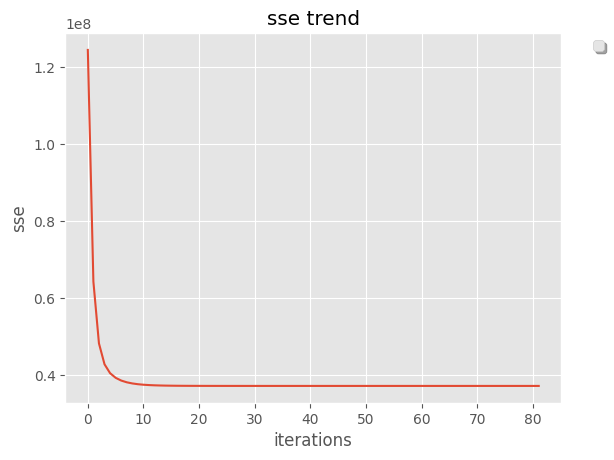


Weights:  [189.27102343   3.66771166  14.25636935   1.23250937  -7.22541651
   0.89561852  -1.00929396  19.00652028  -3.75807989  -5.28425455
   4.66668684   1.33317179   0.54656653  52.19768671 128.13912517] 

Training Data Errors
SSE:  74547354.81283215
RMSE:  78.28166645089378
MAE:  51.0695297150416
R^2 Error:  0.7705837163387343 

Testing Data Errors
SSE:  33002688.830084614
RMSE:  79.5589694399788
MAE:  50.93040477310619
R^2 Error:  0.761001472754853 



In [ ]:
LR = LinearRegression(X, y, tolerance=0.005, learningRate=0.00004, maxIteration=50000, gd=True, lam=.0001, sgd = False, regularization = False, norm = "ridge",error_type='sse') 
LR.fit_train()

SGD W/O Reg.

Data is full rank
Data is not Low Rank
Selected Cost Function:    sse
Solving using Stochastic Gradient Descent


100%|██████████| 50000/50000 [00:01<00:00, 42815.11it/s]


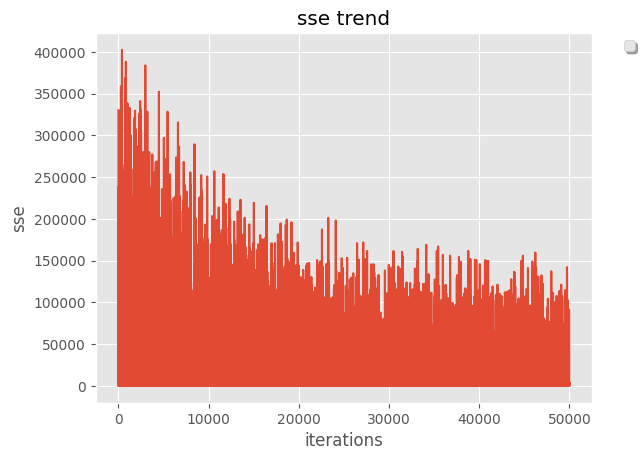


Weights:  [163.27290083   6.96032333  19.60272384   3.40793615  11.79737771
  -2.00815515   0.20272385  14.08363437  -2.99464847  11.72031793
  -7.73379817   2.19394981   0.78481162  52.54843155  90.64645958] 

Training Data Errors
SSE:  93327506.11728671
RMSE:  87.58883981204896
MAE:  53.41527110633258
R^2 Error:  0.678311558265395 

Testing Data Errors
SSE:  41058396.67057061
RMSE:  88.73919397584079
MAE:  53.2921324114306
R^2 Error:  0.6683588636254638 



In [ ]:
LR = LinearRegression(X, y, tolerance=0.005, learningRate=0.00004, maxIteration=50000, gd=True, lam=.0001, sgd = True, regularization = False) 
LR.fit_train()

Mini Batch GD W/O Reg

Data is full rank
Data is not Low Rank
Selected Cost Function:    sse
Solving using Mini Batch Gradient Descent


100%|██████████| 50000/50000 [01:30<00:00, 551.26it/s]


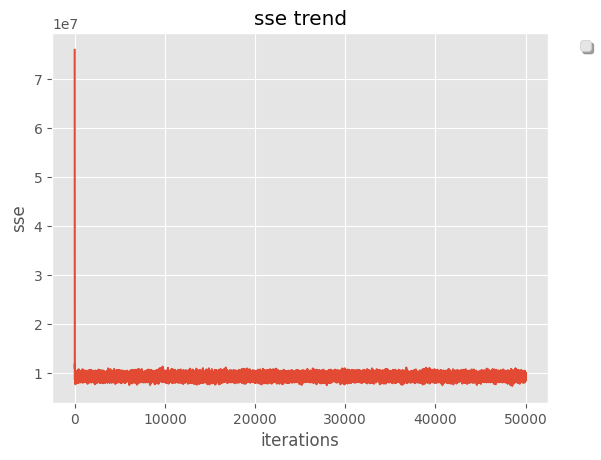


Weights:  [189.67322317   3.41675879  14.12796261   0.90396725  -7.47217845
   0.94761221  -1.147198    19.26943     -3.8054774   -5.22900594
   4.61814333   1.06617013   0.54012838  52.48969924 128.42587586] 

Training Data Errors
SSE:  74555638.82128078
RMSE:  78.28601582031993
MAE:  51.17750148673458
R^2 Error:  0.7713585013510749 

Testing Data Errors
SSE:  32991466.22107263
RMSE:  79.5454412221808
MAE:  51.0290067617229
R^2 Error:  0.7619573608035728 



In [ ]:
LR = LinearRegression(X, y, tolerance=0.005, learningRate=0.00004, maxIteration=50000, gd=True, lam=.0001, sgd = True, regularization = False, norm = "ridge",batch_sample_size = .25,error_type='sse') 
LR.fit_train()

Ridge Regression

GD With Reg.

Data is full rank
Data is not Low Rank
Selected Cost Function:    sse
Solving using Gradient Descent


  0%|          | 60/50000 [00:00<00:29, 1702.68it/s]


Model has stopped learning


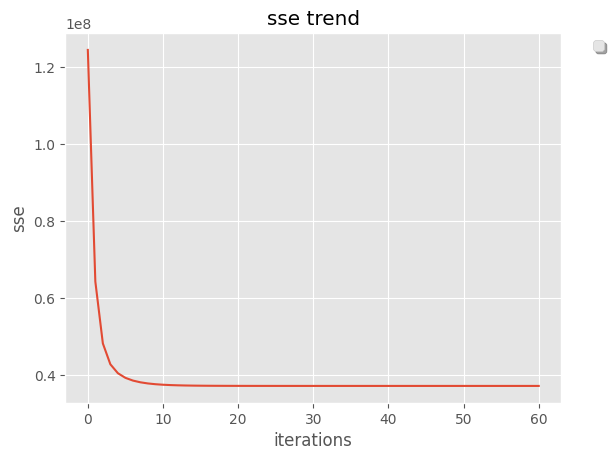


Weights:  [189.30992806   3.67661136  14.25334418   1.21978775  -7.23756419
   0.89911087  -1.00989234  19.01566609  -3.75918548  -5.30099523
   4.68040378   1.33303885   0.54676092  52.20765579 128.17416935] 

Training Data Errors
SSE:  74547385.8830302
RMSE:  78.28168276419312
MAE:  51.08038015742922
R^2 Error:  0.7706499537125151 

Testing Data Errors
SSE:  33002255.006482184
RMSE:  79.55844653300701
MAE:  50.941136799763484
R^2 Error:  0.7610720102288053 



In [ ]:
LR = LinearRegression(X, y, tolerance=0.005, learningRate=0.00004, maxIteration=50000, gd=True, lam=.0001, sgd = False, regularization = True, norm = "ridge",error_type='sse') 
LR.fit_train()

SGD With Reg.

Data is full rank
Data is not Low Rank
Selected Cost Function:    sse
Solving using Stochastic Gradient Descent


100%|██████████| 50000/50000 [00:02<00:00, 20519.19it/s]


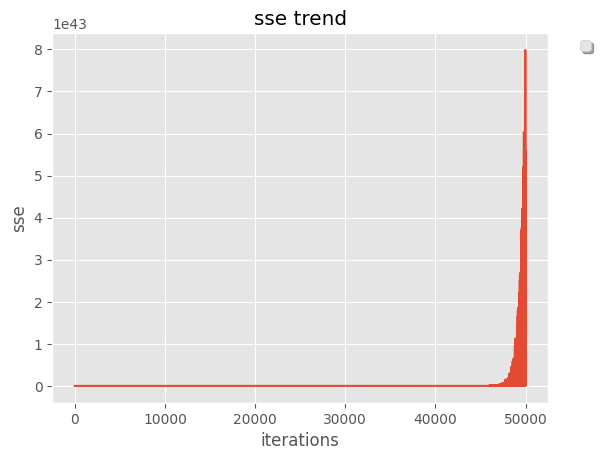


Weights:  [ 5.24000574e+21 -1.39464149e+19  1.40463829e+20 -1.16180301e+19
 -1.78409329e+19  3.77330445e+20  1.04375458e+20  8.79445607e+20
 -2.10095148e+19 -2.13721426e+19  3.01430386e+21  9.88638344e+20
  7.26574896e+19  7.73194636e+20  2.47138567e+21] 

Training Data Errors
SSE:  4.771476649527082e+47
RMSE:  6.26282598430749e+21
MAE:  5.429676834808453e+21
R^2 Error:  0.0 

Testing Data Errors
SSE:  2.0722763880580997e+47
RMSE:  6.30432111120231e+21
MAE:  5.477776936314934e+21
R^2 Error:  0.0 



In [20]:
LR = LinearRegression(X, y, tolerance=0.005, learningRate=0.00004, maxIteration=50000, gd=True, lam=.0001, sgd = True, regularization = True, norm = "ridge") 
LR.fit_train()

Mini Batch GD W Reg

Data is full rank
Data is not Low Rank
Selected Cost Function:    sse
Solving using Mini Batch Gradient Descent


100%|██████████| 50000/50000 [01:31<00:00, 547.84it/s]


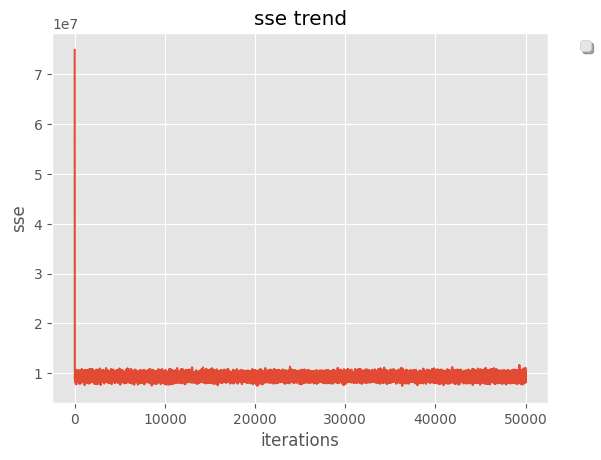


Weights:  [188.99101486   3.33188852  14.19798055   1.20519002  -7.50398176
   1.0458014   -0.71354331  18.74260088  -3.95123733  -4.9252874
   4.73626411   1.67387038   0.57401939  52.10880603 128.1896034 ] 

Training Data Errors
SSE:  74554617.987057
RMSE:  78.28547986275173
MAE:  50.99482642043689
R^2 Error:  0.7704756468609654 

Testing Data Errors
SSE:  33008985.420865476
RMSE:  79.56655861527696
MAE:  50.84793768220545
R^2 Error:  0.7608758488355571 



In [ ]:
LR = LinearRegression(X, y, tolerance=0.005, learningRate=0.00004, maxIteration=50000, gd=True, lam=.0001, sgd = True, regularization = True, norm = "ridge",batch_sample_size=0.25) 
LR.fit_train()

Lasso Regression

GD With Reg.

Data is full rank
Data is not Low Rank
Selected Cost Function:    sse
Solving using Gradient Descent


  0%|          | 60/50000 [00:00<00:30, 1646.31it/s]


Model has stopped learning


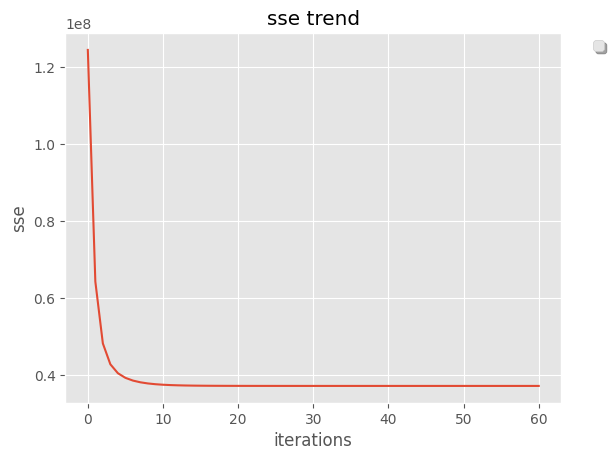


Weights:  [189.30992806   3.67661136  14.25334418   1.21978775  -7.23756419
   0.89911087  -1.00989234  19.01566609  -3.75918548  -5.30099523
   4.68040378   1.33303885   0.54676092  52.20765579 128.17416935] 

Training Data Errors
SSE:  74547385.8830302
RMSE:  78.28168276419312
MAE:  51.08038015742922
R^2 Error:  0.7706499537125151 

Testing Data Errors
SSE:  33002255.006482184
RMSE:  79.55844653300701
MAE:  50.941136799763484
R^2 Error:  0.7610720102288053 



In [ ]:
LR = LinearRegression(X, y, tolerance=0.005, learningRate=0.00004, maxIteration=50000, gd=True, lam=.0001, sgd = False, regularization = True, norm = "lasso") 
LR.fit_train()

SGD With Reg.

Data is full rank
Data is not Low Rank
Selected Cost Function:    sse
Solving using Stochastic Gradient Descent


100%|██████████| 50000/50000 [00:01<00:00, 41427.98it/s]


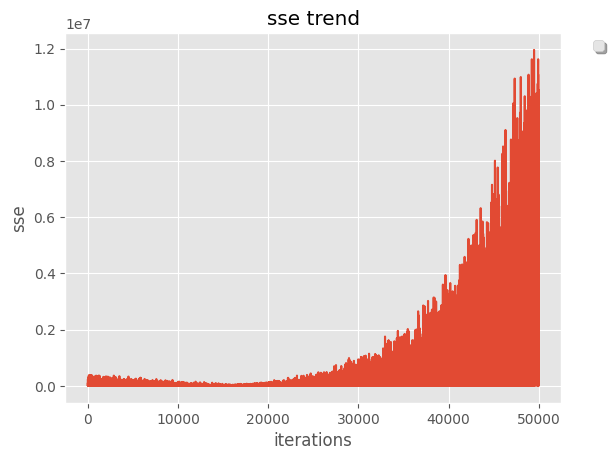


Weights:  [2414.07014078  -47.00588739  129.93591319  -35.37086142  -88.39760904
   68.87861714   12.63415445  317.74792305   64.75197843 -106.80728597
  530.97870954   -6.34804603   16.13108072  393.20200659 1203.48151549] 

Training Data Errors
SSE:  77186006180.12196
RMSE:  2518.913351072526
MAE:  2234.7896252292812
R^2 Error:  0.05421338345626714 

Testing Data Errors
SSE:  33181283035.20495
RMSE:  2522.6736686829076
MAE:  2241.583609080453
R^2 Error:  0.05363772411545942 



In [ ]:
LR = LinearRegression(X, y, tolerance=0.005, learningRate=0.00004, maxIteration=50000, gd=True, lam=.0001, sgd = True, regularization = True, norm = "lasso") 
LR.fit_train()

Mini Batch GD With Reg.

Data is full rank
Data is not Low Rank
Selected Cost Function:    sse
Solving using Mini Batch Gradient Descent


100%|██████████| 50000/50000 [01:36<00:00, 520.36it/s]


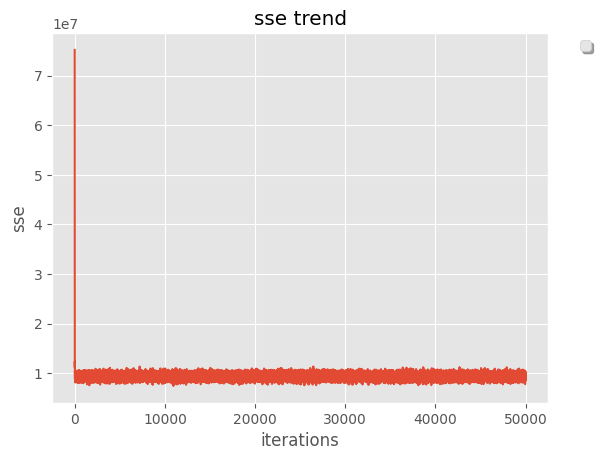


Weights:  [189.53619646   3.7767305   14.47735412   1.12393339  -6.95193
   1.03743619  -0.77970922  18.9236266   -3.8352558   -4.87083183
   4.16260777   1.53986859   0.55863882  52.38412978 128.27112598] 

Training Data Errors
SSE:  74565146.36751494
RMSE:  78.29100728843096
MAE:  51.30141828422407
R^2 Error:  0.7729148428642261 

Testing Data Errors
SSE:  32985266.953908406
RMSE:  79.53796737112769
MAE:  51.13777590915297
R^2 Error:  0.7636185868614036 



In [ ]:
LR = LinearRegression(X, y, tolerance=0.005, learningRate=0.00004, maxIteration=50000, gd=True, lam=.0000001, sgd = True, regularization = True, norm = "lasso",batch_sample_size=.25) 
LR.fit_train()


 Assessing alpha = 4e-05 and lambda = 0.0001 using cost function sse
Data is full rank
Data is not Low Rank
Selected Cost Function:    sse
Solving using Gradient Descent


  0%|          | 60/50000 [00:00<00:38, 1282.17it/s]


Model has stopped learning


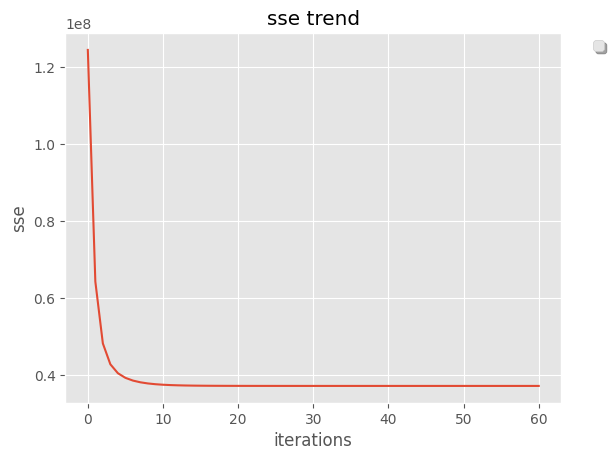


Weights:  [189.30992806   3.67661136  14.25334418   1.21978775  -7.23756419
   0.89911087  -1.00989234  19.01566609  -3.75918548  -5.30099523
   4.68040378   1.33303885   0.54676092  52.20765579 128.17416935] 

Training Data Errors
SSE:  74547385.8830302
RMSE:  78.28168276419312
MAE:  51.08038015742922
R^2 Error:  0.7706499537125151 

Testing Data Errors
SSE:  33002255.006482184
RMSE:  79.55844653300701
MAE:  50.941136799763484
R^2 Error:  0.7610720102288053 


 Assessing alpha = 4e-05 and lambda = 0.0001 using cost function rmse
Data is full rank
Data is not Low Rank
Selected Cost Function:    rmse
Solving using Gradient Descent


  0%|          | 18/50000 [00:00<00:36, 1366.79it/s]


Model has stopped learning


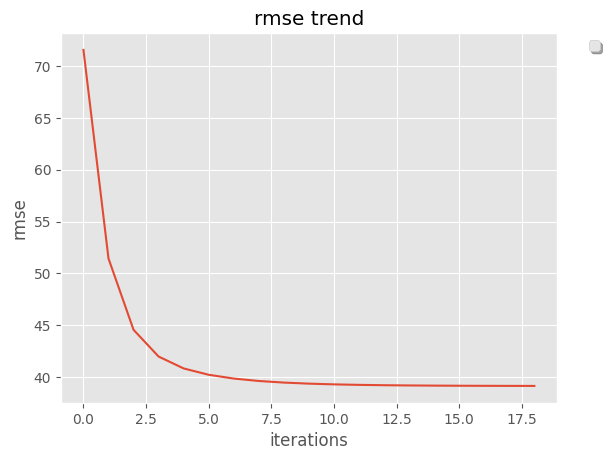


Weights:  [189.30932904   4.08927597  14.63982837   1.12755248  -6.02317542
   0.92452839  -0.99380306  19.77963909  -3.68510105  -5.13597148
   4.39978017   1.27744298   0.56291405  54.13287738 125.18360941] 

Training Data Errors
SSE:  74594645.69576514
RMSE:  78.3064924303336
MAE:  50.8955461219747
R^2 Error:  0.7690213270210239 

Testing Data Errors
SSE:  33001071.776147258
RMSE:  79.55702031514556
MAE:  50.76149608713229
R^2 Error:  0.7595455562695523 


 Assessing alpha = 4e-05 and lambda = 0.0001 using cost function mae
Data is full rank
Data is not Low Rank
Selected Cost Function:    mae
Solving using Gradient Descent


  0%|          | 26/50000 [00:00<00:28, 1740.79it/s]


Model has stopped learning


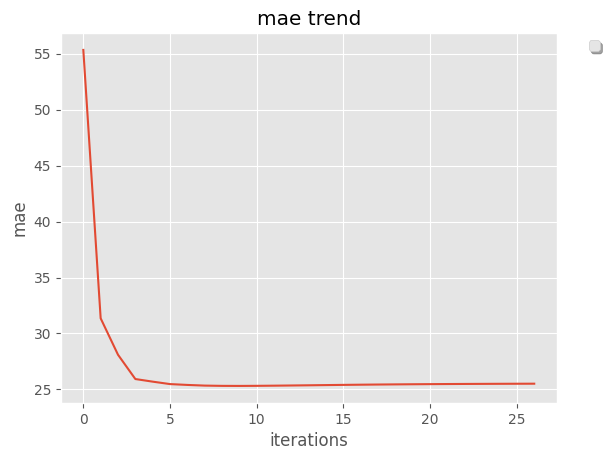


Weights:  [189.30992516   3.88521086  14.35112848   1.11492588  -6.88045647
   0.93476581  -1.01172699  19.36367428  -3.78895387  -5.38976274
   4.70122025   1.33478042   0.55104898  53.01133917 127.21763596] 

Training Data Errors
SSE:  74552706.18462804
RMSE:  78.28447611989797
MAE:  51.01864328389741
R^2 Error:  0.7702668196223807 

Testing Data Errors
SSE:  32999541.858775564
RMSE:  79.55517617688618
MAE:  50.883787145258474
R^2 Error:  0.7607043932379244 


 Assessing alpha = 4e-05 and lambda = 0.001 using cost function sse
Data is full rank
Data is not Low Rank
Selected Cost Function:    sse
Solving using Gradient Descent


  0%|          | 117/50000 [00:00<00:25, 1964.98it/s]


Model has stopped learning


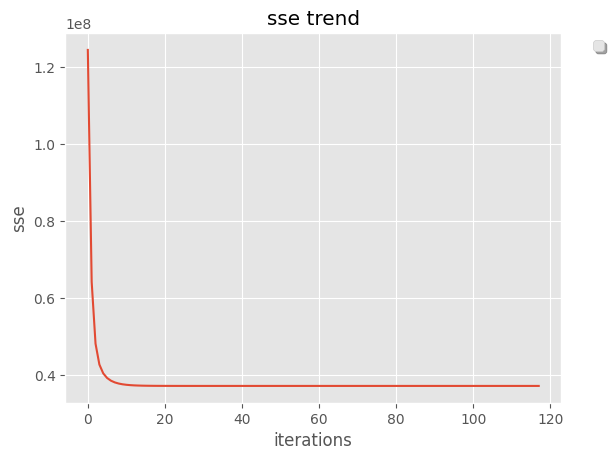


Weights:  [189.66079077   3.61957772  14.21534091   1.22378842  -7.39406368
   0.91877633  -1.01667635  19.03662658  -3.75484196  -5.40453015
   4.78006486   1.32544475   0.54864525  52.16134227 128.62016181] 

Training Data Errors
SSE:  74550662.07367817
RMSE:  78.28340289761047
MAE:  51.18684115028389
R^2 Error:  0.7712698757377823 

Testing Data Errors
SSE:  33000007.986152913
RMSE:  79.55573804399988
MAE:  51.046121598143195
R^2 Error:  0.7617348355611943 


 Assessing alpha = 4e-05 and lambda = 0.001 using cost function rmse
Data is full rank
Data is not Low Rank
Selected Cost Function:    rmse
Solving using Gradient Descent


  0%|          | 18/50000 [00:00<00:35, 1407.77it/s]


Model has stopped learning


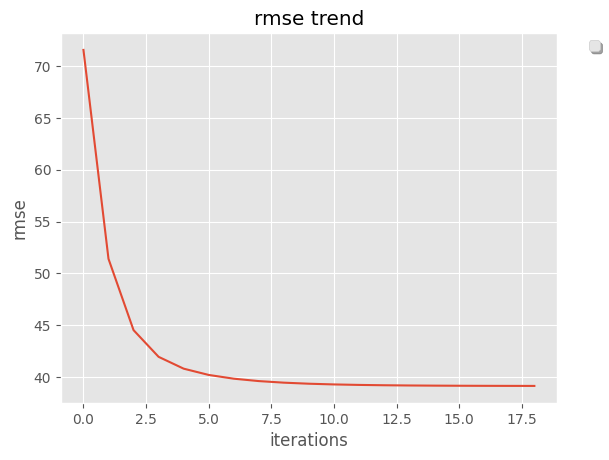


Weights:  [189.66017034   4.06433953  14.61038097   1.1098007   -6.1551217
   0.94735817  -1.000939    19.83168553  -3.68256021  -5.25055809
   4.49910793   1.27037634   0.56493265  54.15962185 125.54596655] 

Training Data Errors
SSE:  74588475.51770431
RMSE:  78.3032537595892
MAE:  50.994034694020776
R^2 Error:  0.7696383574743054 

Testing Data Errors
SSE:  32994427.812358133
RMSE:  79.54901147573136
MAE:  50.857902943047726
R^2 Error:  0.7602057643823807 


 Assessing alpha = 4e-05 and lambda = 0.001 using cost function mae
Data is full rank
Data is not Low Rank
Selected Cost Function:    mae
Solving using Gradient Descent


  0%|          | 9/50000 [00:00<00:54, 914.26it/s]


Model has stopped learning


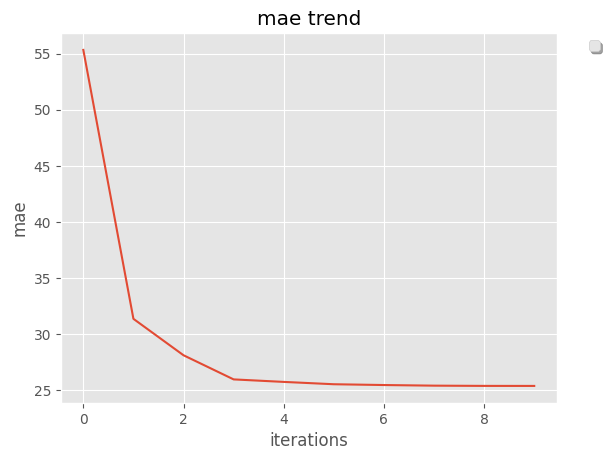


Weights:  [189.41476129   4.70981211  16.4543136    1.42653081  -1.4480226
   0.41973337  -0.74392304  19.94706211  -2.73307631  -1.84040114
   1.82707181   0.96601124   0.63165606  56.17490588 116.13212478] 

Training Data Errors
SSE:  75399676.75221315
RMSE:  78.72790330050694
MAE:  50.70063068097629
R^2 Error:  0.760224002992697 

Testing Data Errors
SSE:  33239818.771081895
RMSE:  79.84428022947448
MAE:  50.53213534934384
R^2 Error:  0.7513985238321297 


 Assessing alpha = 4e-05 and lambda = 0.01 using cost function sse
Data is full rank
Data is not Low Rank
Selected Cost Function:    sse
Solving using Gradient Descent


  0%|          | 159/50000 [00:00<00:26, 1874.84it/s]


Model has stopped learning


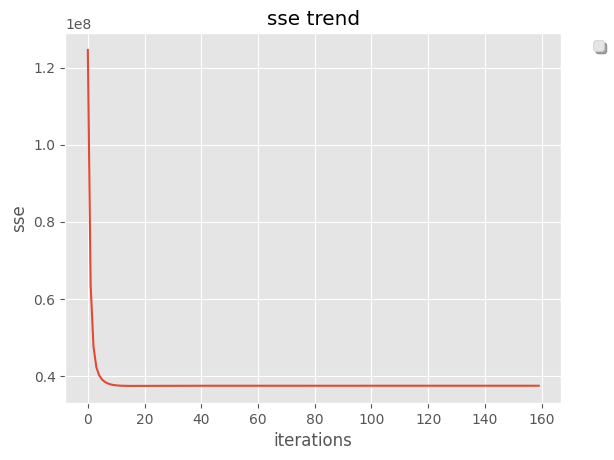


Weights:  [193.24229962   3.14997344  13.82147245   1.14261783  -8.93317413
   1.1350294   -1.07929216  19.27255165  -3.73867348  -6.47383376
   5.85800259   1.25742885   0.56901509  51.7087191  133.15705493] 

Training Data Errors
SSE:  74895309.6374884
RMSE:  78.46414625307978
MAE:  52.39457346759712
R^2 Error:  0.776711327795087 

Testing Data Errors
SSE:  33109913.885517735
RMSE:  79.6881073589589
MAE:  52.22522386929809
R^2 Error:  0.7676038190596437 


 Assessing alpha = 4e-05 and lambda = 0.01 using cost function rmse
Data is full rank
Data is not Low Rank
Selected Cost Function:    rmse
Solving using Gradient Descent


  0%|          | 15/50000 [00:00<00:43, 1145.57it/s]


Model has stopped learning


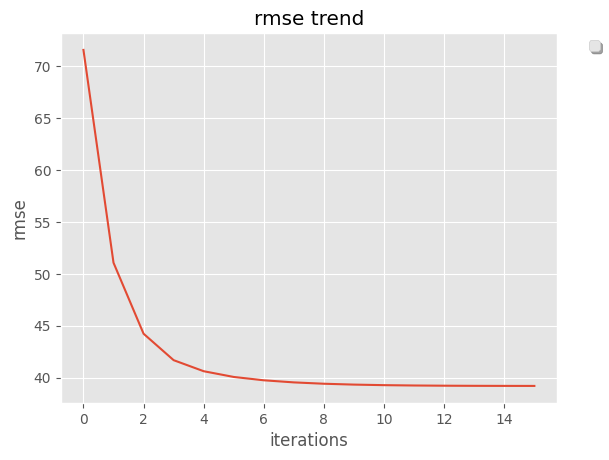


Weights:  [193.23616989   3.96537109  14.63883401   0.97555376  -6.60525603
   1.12500265  -1.04004797  20.59136193  -3.51047754  -5.94215505
   5.08874076   1.13361499   0.59899985  55.20505431 127.26604066] 

Training Data Errors
SSE:  74806425.86481637
RMSE:  78.41757284416512
MAE:  51.973762444511706
R^2 Error:  0.773845899330551 

Testing Data Errors
SSE:  33028662.204439335
RMSE:  79.59027004848244
MAE:  51.81905843530017
R^2 Error:  0.7649475889823345 


 Assessing alpha = 4e-05 and lambda = 0.01 using cost function mae
Data is full rank
Data is not Low Rank
Selected Cost Function:    mae
Solving using Gradient Descent


  0%|          | 29/50000 [00:00<00:38, 1308.83it/s]


Model has stopped learning


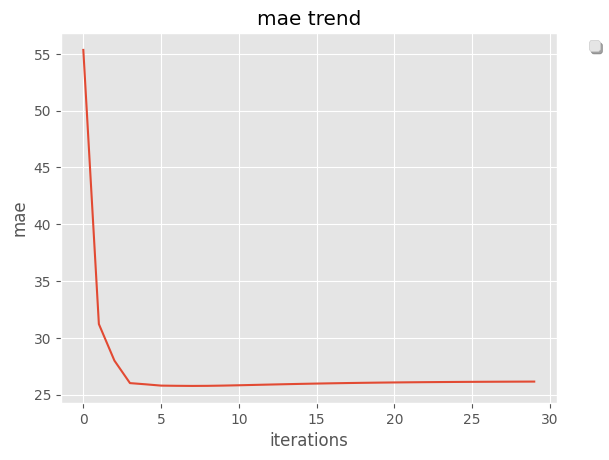


Weights:  [193.24229891   3.44823169  13.90707329   0.94847676  -8.61239138
   1.18410245  -1.08306764  19.66177392  -3.7837783   -6.61995175
   5.91812232   1.26962997   0.57226686  52.58714406 132.2088408 ] 

Training Data Errors
SSE:  74866565.78565511
RMSE:  78.44908804555482
MAE:  52.322690063801566
R^2 Error:  0.7764745766884081 

Testing Data Errors
SSE:  33093465.291726287
RMSE:  79.6683108692289
MAE:  52.159781854471866
R^2 Error:  0.7673742170912623 


 Assessing alpha = 4e-05 and lambda = 0.1 using cost function sse
Data is full rank
Data is not Low Rank
Selected Cost Function:    sse
Solving using Gradient Descent


  0%|          | 249/50000 [00:00<00:25, 1952.82it/s]

Model has stopped learning


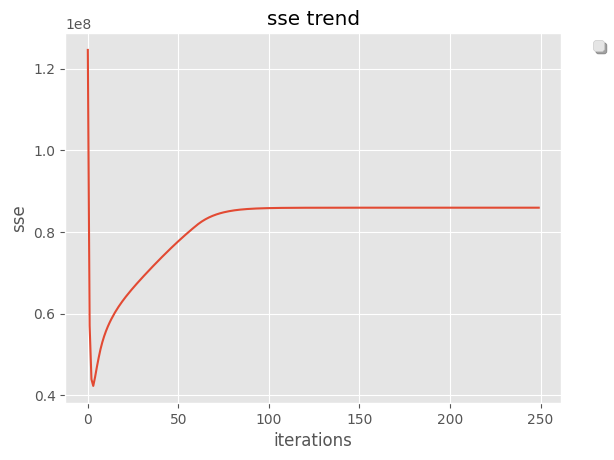


Weights:  [238.22886705  -6.11447205   3.53241694  -1.55999781 -34.90552354
   2.09985493  -0.93380735  -0.33046227  -4.15667613 -13.53320855
  23.32640942   0.36716167   0.88918958  -6.01677106 244.24074961] 

Training Data Errors
SSE:  171845570.81377906
RMSE:  118.85381185031684
MAE:  94.45239062178214
R^2 Error:  0.7034895402689054 

Testing Data Errors
SSE:  74518010.71221991
RMSE:  119.54877021676705
MAE:  95.04322231683662
R^2 Error:  0.6965628158903587 


 Assessing alpha = 4e-05 and lambda = 0.1 using cost function rmse
Data is full rank
Data is not Low Rank
Selected Cost Function:    rmse
Solving using Gradient Descent


  0%|          | 97/50000 [00:00<00:38, 1296.41it/s]


Model has stopped learning


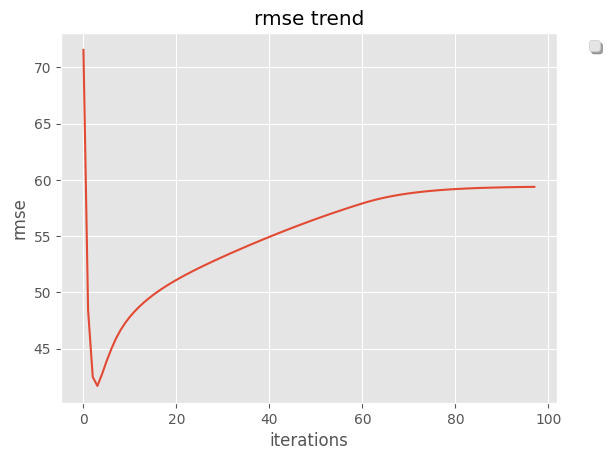


Weights:  [238.22886705  -6.08950253   3.57199568  -1.5571035  -34.83589838
   2.09629066  -0.93299083  -0.2968674   -4.15026879 -13.50909838
  23.27776177   0.36595489   0.88917318  -5.91366414 244.00793665] 

Training Data Errors
SSE:  171574385.61024734
RMSE:  118.75999470700147
MAE:  94.36978076484584
R^2 Error:  0.7036723456910463 

Testing Data Errors
SSE:  74401112.47394721
RMSE:  119.4549638634903
MAE:  94.95946436637117
R^2 Error:  0.6967478073899482 


 Assessing alpha = 4e-05 and lambda = 0.1 using cost function mae
Data is full rank
Data is not Low Rank
Selected Cost Function:    mae
Solving using Gradient Descent


  0%|          | 96/50000 [00:00<00:39, 1278.47it/s]


Model has stopped learning


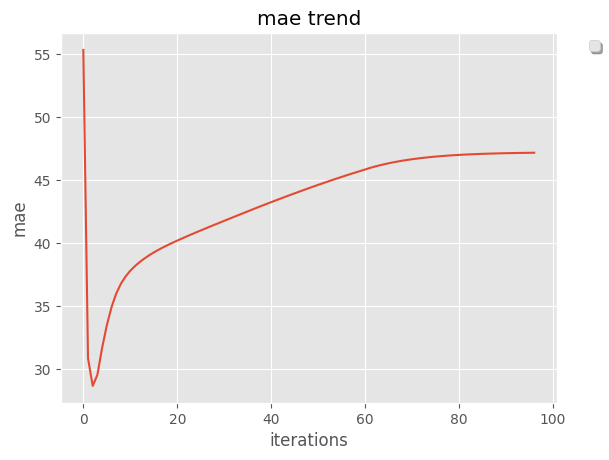


Weights:  [238.22886705  -6.08694909   3.57609817  -1.5568436  -34.82866099
   2.09597135  -0.93289184  -0.29331263  -4.1498419  -13.50669973
  23.27328683   0.36607678   0.88918025  -5.90284038 243.98395437] 

Training Data Errors
SSE:  171546552.15629694
RMSE:  118.75036146570878
MAE:  94.3612771167202
R^2 Error:  0.7036911142832267 

Testing Data Errors
SSE:  74389117.74245189
RMSE:  119.445334384014
MAE:  94.95084988460196
R^2 Error:  0.6967667628846588 



In [ ]:
#alphas = [.00004,.0004,.004,.04]
alphas = [.00004]
lamdas = [.0001,.001,.01,.1]
cost_funcs = ['sse','rmse','mae']
r2_errors = []
mae_errors = []
sse_errors = []
rmse_errors = []

for i in alphas:
  for j in lamdas:
    for err in cost_funcs:
      print("\n Assessing alpha = {} and lambda = {} using cost function {}".format(i,j,err))
      LR = LinearRegression(X, y, tolerance=0.005, learningRate=i, maxIteration=50000, gd=True, lam=j, sgd = False, regularization = True, norm = "ridge",error_type = err) 
      LR.fit_train()

## What if we trained on the daily dataset???

Data is full rank
Data is not Low Rank
Selected Cost Function:    sse
Solving using Gradient Descent


  8%|▊         | 4172/50000 [00:00<00:01, 25940.16it/s]


Model has stopped learning


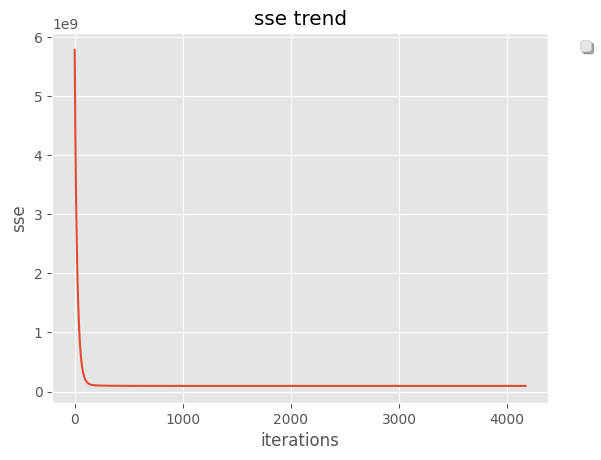


Weights:  [4487.9612914   427.49091365  795.02650121  -72.15736979    7.78706691
   69.81632723  592.64333548 -180.62423924  149.54230678   70.63097093
  -96.54255702 -359.45473701  975.47461505  176.17169284] 

Training Data Errors
SSE:  192587006.28761214
RMSE:  613.9076440921542
MAE:  449.1488817265072
R^2 Error:  0.8824635809635584 

Testing Data Errors
SSE:  84897038.0499284
RMSE:  621.2049802598773
MAE:  490.8610359554265
R^2 Error:  0.8945436003051176 



In [ ]:
X_t = df_test_historical.values[:,0:-1]
y_t = df_test_historical.values[:, -1]

LR = LinearRegression(X_t, y_t, tolerance=0.005, learningRate=0.00004, maxIteration=50000, gd=True, lam=.0000001, sgd = False, regularization = True,norm = 'ridge') 
LR.fit_train()

Neural Networks

In [ ]:
dum_data = ['season', 'weather', 'month', 'hour', 'weekday']
for each in dum_data:
    dumm = pd.get_dummies(df[each], prefix=each, drop_first=False)
    df = pd.concat([df, dumm], axis=1)

datadrop = ['instant', 'date', 'season', 'weather', 
                  'weekday', 'temp_actual', 'month', 'workingday', 'hour']
data = df.drop(datadrop, axis=1)
data.head()

,year,holiday,temp_feel,humidity,windspeed,unregistered,registered,total_count,season_1,season_2,...,hour_21,hour_22,hour_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.2879,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.2727,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.2727,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.2879,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.2879,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
datafea = ['unregistered', 'registered', 'total_count', 'temp_feel', 'humidity', 'windspeed']
fea_scal = {}
for each in datafea:
    mean, std = data[each].mean(), data[each].std()
    fea_scal[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [ ]:
# Data should be separated into features and targets.
test_data = data[-21*24:]
data = data[:-21*24]
data_Target = ['total_count', 'unregistered', 'registered']
features, targets = data.drop(data_Target, axis=1), data[data_Target]
fea_test, Targetdata_test = test_data.drop(data_Target, axis=1), test_data[data_Target]

In [ ]:
# Save the most recent 60 days or so of data as a validation set.
Feature_testdata, Target_traindata = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

In [ ]:
class NeuralNetwork(object):
    def __init__(self, ip_nodes, hidden_nodes, op_nodes, learning_rate):
        
        self.ip_nodes = ip_nodes
        self.hidden_nodes = hidden_nodes
        self.op_nodes = op_nodes

    
        self.hidden_input_weigh = np.random.normal(0.0, self.ip_nodes**-0.5, 
                                       (self.ip_nodes, self.hidden_nodes))

        self.hidden_output_weigh = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.op_nodes))
        self.lr = learning_rate
        self.act_funct = lambda x : (1/ (1+ np.exp(-x)))   
                    

    def train(self, features, targets):
        record_n = features.shape[0]
        weight_input_Del = np.zeros(self.hidden_input_weigh.shape)
        weight_output_Del = np.zeros(self.hidden_output_weigh.shape)
        for X, y in zip(features, targets):
            
            Op_final, Op_hidden = self.pass_forwad_train(X)
         
            weight_input_Del, weight_output_Del = self.backpropagation(Op_final, Op_hidden, X, y, 
                                                                     weight_input_Del, weight_output_Del)
        self.wt_update(weight_input_Del, weight_output_Del, record_n)
        
    def pass_forwad_train(self, X):
     
        ip_hidden = np.dot(X, self.hidden_input_weigh) 
        Op_hidden = self.act_funct(ip_hidden) 

        ip_final =  np.dot(Op_hidden, self.hidden_output_weigh)
        Op_final = ip_final 
        
        return Op_final, Op_hidden

    def backpropagation(self, Op_final, Op_hidden, X, y, weight_input_Del, weight_output_Del):

        error = y - Op_final
        errorhide = np.dot(self.hidden_output_weigh, error)
        errorhide_op = error 

        errorhide_term = errorhide * Op_hidden * (1 - Op_hidden)
        weight_input_Del += errorhide_term * X[:,None]
        weight_output_Del += errorhide_op * Op_hidden[:,None]
        return weight_input_Del, weight_output_Del

    def wt_update(self, weight_input_Del, weight_output_Del, record_n):

        self.hidden_output_weigh += self.lr * weight_output_Del / record_n 
        self.hidden_input_weigh += self.lr * weight_input_Del / record_n 
    def NN_model_fit(self, features):

        ip_hidden =  np.dot(features, self.hidden_input_weigh)
        Op_hidden = self.act_funct(ip_hidden)

        ip_final = np.dot(Op_hidden, self.hidden_output_weigh)
        Op_final = ip_final  
        
        return Op_final


In [ ]:
import sys
def MSE(y, Y):
    return np.mean((y-Y)**2)

# Analyze 128 records at random from the training data set.
N_i = Feature_testdata.shape[1]
hidden_nodes = 5
op_nodes = 10
learning_rate = 0.001
network = NeuralNetwork(N_i, hidden_nodes, op_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
iterations = 10
for ii in range(iterations):
    batch = np.random.choice(Feature_testdata.index, size=128)
    X, y = Feature_testdata.loc[batch].values, Target_traindata.loc[batch]['total_count']                   
    network.train(X, y)
    
    # Printing out traning Results
    training_loss = MSE(network.NN_model_fit(Feature_testdata).T, Target_traindata['total_count'].values)
    validation_loss = MSE(network.NN_model_fit(val_features).T, val_targets['total_count'].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... ..Training loss: " + str(training_loss)[:5] \
                     + " ..... Validation loss: " + str(validation_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(training_loss)
    losses['validation'].append(validation_loss)

Progress: 90.0% ... ..Training loss: 1.382 ..... Validation loss: 1.889

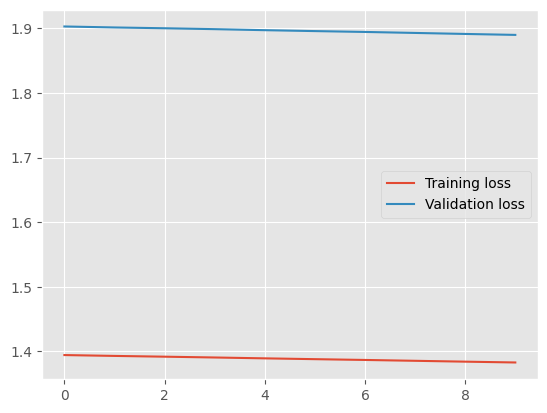

In [ ]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

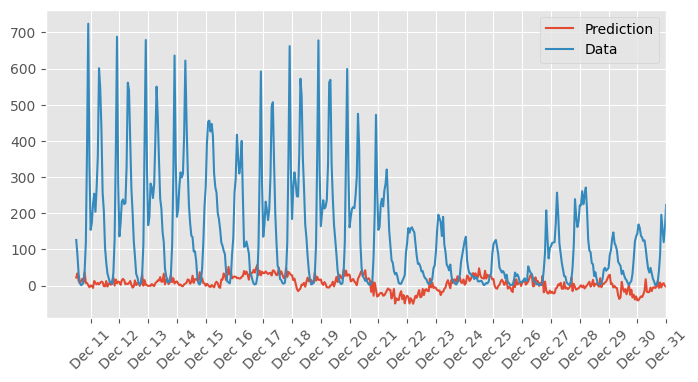

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = fea_scal['total_count']
Pred = network.NN_model_fit(fea_test).T*std + mean
ax.plot(Pred[0], label='Prediction')
ax.plot((Targetdata_test['total_count']*std + mean).values, label='Data')
ax.set_xlim(right=len(Pred))
ax.legend()

dat = pd.to_datetime(df.loc[test_data.index]['date'])
dat = dat.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dat))[12::24])
_ = ax.set_xticklabels(dat[12::24], rotation=45)


the proportion of Decembers training instances is
5.801481481481482
The proportion of training examples for each month should be if we wish  
 to provide an equal number of training examples for each month.
8.333333333333334


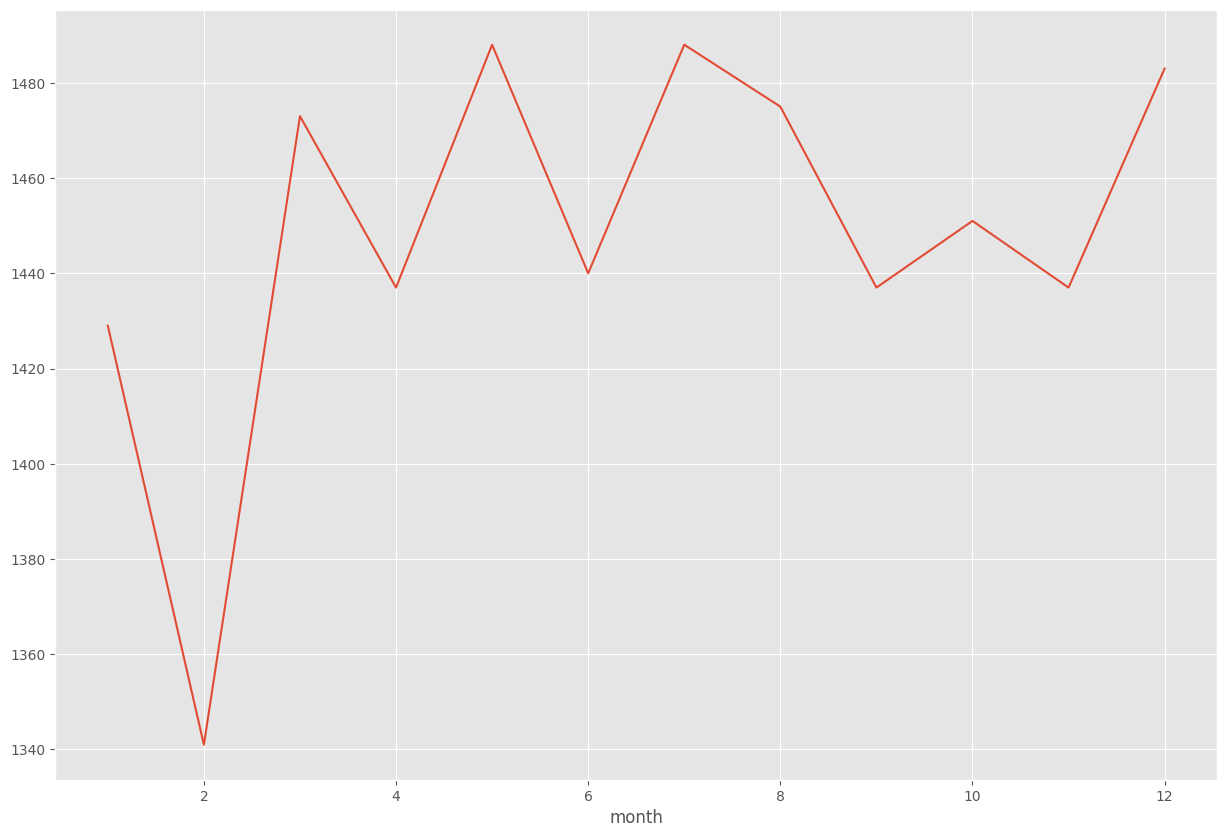

In [ ]:
print('the proportion of Decembers training instances is')
print(data[data['month_12'] == 1 ].shape[0] / data.shape[0]*100)
print('The proportion of training examples for each month should be if we wish  \n \
to provide an equal number of training examples for each month.')
print(100/12) 
fig, ax = plt.subplots(figsize=(15,10))
df.groupby(['month']).count()['total_count'].plot(ax=ax);
